In [1]:
import io
import requests

from PIL import Image as im

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
import pandas as pd

pdf = pd.read_parquet('../../ftransfer_ztf_2024-02-01_689626')


In [3]:
pdf

,candid,schemavsn,publisher,objectId,candidate,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference,cdsxmatch,...,fink_broker_version,fink_science_version,timestamp,year,month,day,tnsclass,lc_features_g,lc_features_r,finkclass
0,1356264842615015004,3.3,Fink,ZTF17aaaeclk,"{'aimage': 0.7979999780654907, 'aimagerat': 0....","[{'aimage': 0.75, 'aimagerat': 0.3048779964447...",{'fileName': 'candid1356264842615015004_pid135...,{'fileName': 'candid1356264842615015004_ref.fi...,{'fileName': 'candid1356264842615015004_pid135...,**,...,1.4,0.5.1,2020-09-18 06:21:22.996783,2020,9,18,Unknown,"{'amplitude': 0.8889999389648438, 'anderson_da...","{'amplitude': None, 'anderson_darling_normal':...",**
1,1356465031915010013,3.3,Fink,ZTF17aaarimh,"{'aimage': 0.5720000267028809, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356465031915010013_pid135...,{'fileName': 'candid1356465031915010013_ref.fi...,{'fileName': 'candid1356465031915010013_pid135...,**,...,1.4,0.5.1,2020-09-18 11:09:38.99808,2020,9,18,Unknown,"{'amplitude': 0.8722000122070312, 'anderson_da...","{'amplitude': 1.0413002967834473, 'anderson_da...",**
2,1356505554015010002,3.3,Fink,ZTF18acevrat,"{'aimage': 0.5870000123977661, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356505554015010002_pid135...,{'fileName': 'candid1356505554015010002_ref.fi...,{'fileName': 'candid1356505554015010002_pid135...,**,...,1.4,0.5.1,2020-09-18 12:08:00.003834,2020,9,18,Unknown,"{'amplitude': None, 'anderson_darling_normal':...","{'amplitude': None, 'anderson_darling_normal':...",**
3,1356244742415010062,3.3,Fink,ZTF18abhxxas,"{'aimage': 0.7329999804496765, 'aimagerat': 0....","[{'aimage': 0.6629999876022339, 'aimagerat': 0...",{'fileName': 'candid1356244742415010062_pid135...,{'fileName': 'candid1356244742415010062_ref.fi...,{'fileName': 'candid1356244742415010062_pid135...,**,...,1.4,0.5.1,2020-09-18 05:52:26.002543,2020,9,18,Unknown,"{'amplitude': 0.27915000915527344, 'anderson_d...","{'amplitude': None, 'anderson_darling_normal':...",**
4,1356301332615015001,3.3,Fink,ZTF17aaaeclk,"{'aimage': 0.7870000004768372, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356301332615015001_pid135...,{'fileName': 'candid1356301332615015001_ref.fi...,{'fileName': 'candid1356301332615015001_pid135...,**,...,1.4,0.5.1,2020-09-18 07:13:54.998395,2020,9,18,Unknown,"{'amplitude': 0.8889999389648438, 'anderson_da...","{'amplitude': 0.47859954833984375, 'anderson_d...",**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44778,1356523196215015015,3.3,Fink,ZTF17aacphlk,"{'aimage': 0.8650000095367432, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356523196215015015_pid135...,{'fileName': 'candid1356523196215015015_ref.fi...,{'fileName': 'candid1356523196215015015_pid135...,low-mass*,...,1.4,0.5.1,2020-09-18 12:33:23.996171,2020,9,18,Unknown,"{'amplitude': 0.2353506088256836, 'anderson_da...","{'amplitude': None, 'anderson_darling_normal':...",low-mass*
44779,1356524134815010001,3.3,Fink,ZTF17aadmoab,"{'aimage': 0.531000018119812, 'aimagerat': 0.4...","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356524134815010001_pid135...,{'fileName': 'candid1356524134815010001_ref.fi...,{'fileName': 'candid1356524134815010001_pid135...,low-mass*,...,1.4,0.5.1,2020-09-18 12:34:44.996174,2020,9,18,Unknown,"{'amplitude': 0.3597993850708008, 'anderson_da...","{'amplitude': 0.5209999084472656, 'anderson_da...",low-mass*
44780,1356341050615015003,3.3,Fink,ZTF17aabuuwi,"{'aimage': 0.7689999938011169, 'aimagerat': 0....","[{'aimage': 0.48500001430511475, 'aimagerat': ...",{'fileName': 'candid1356341050615015003_pid135...,{'fileName': 'candid1356341050615015003_ref.fi...,{'fileName': 'candid1356341050615015003_pid135...,post-AGB*,...,1.4,0.5.1,2020-09-18 08:11:06.996476,2020,9,18,Unknown,"{

In [4]:
Id = pdf['objectId'][1]

id_plus_repete = pdf['objectId'].value_counts().idxmax()

# We select data based on their shared ID, (here opting for the most frequently occurring alert).
pdf_selectionne = pdf.loc[pdf['objectId'] == id_plus_repete]



In [5]:
# Selecting the final alert ( if data is ordered).
pdf_selectionne = pdf_selectionne.iloc[-1]

In [6]:
pdf_selectionne['objectId']

'ZTF18adbmoft'

In [7]:
pdf_selectionne_cand = pdf_selectionne['prv_candidates'] 

In [8]:
#  'candidate' the actual value 
keys = pdf_selectionne_cand[0].keys()
actual_cand = {key: pdf_selectionne['candidate'][key] for key in keys if key in pdf_selectionne['candidate']}


In [9]:
liste_dicts = list(pdf_selectionne_cand)
liste_dicts.append(actual_cand)
df = pd.DataFrame(liste_dicts)

In [10]:
df

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,sigmagnr,sigmapsf,sky,ssdistnr,ssmagnr,ssnamenr,sumrat,tblid,xpos,ypos
0,0.834,0.698080,0.788,0.659577,1.327451e+18,0.506,38.930698,0.019,0.089630,0.000006,...,0.018,0.081736,0.174667,NaN,NaN,None,0.921578,3.0,264.931000,552.168030
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067182,0.000014,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,1.128,0.484120,1.038,0.445494,1.328446e+18,0.966,1.545020,0.648,-0.041911,0.000025,...,0.019,0.140106,-0.024658,NaN,NaN,None,1.000000,1.0,264.778015,522.242004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087819,0.000005,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,0.915,0.731859,0.835,0.667871,1.329476e+18,0.506,23.880400,0.996,0.091457,0.000006,...,0.018,0.085136,0.029418,NaN,NaN,None,1.000000,5.0,283.713013,580.533997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080654,0.000035,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
72,0.638,0.254183,0.588,0.234263,1.356463e+18,0.506,42.842602,0.976,0.081411,0.000009,...,0.018,0.078897,0.060207,NaN,NaN,None,0.918820,5.0,237.212006,824.260986
73,1.125,0.354890,0.993,0.313249,1.356489e+18,0.564,13.679300,0.748,0.092013,0.000004,...,0.013,0.044373,0.551492,NaN,NaN,None,1.000000,3.0,828.994019,853.330017
74,0.841,0.426904,0.750,0.380711,1.356506e+18,0.701,5.281990,0.953,-0.076709,0.000007,...,0.017,0.091629,0.735663,NaN,NaN,None,1.000000,10.0,787.593994,853.427979


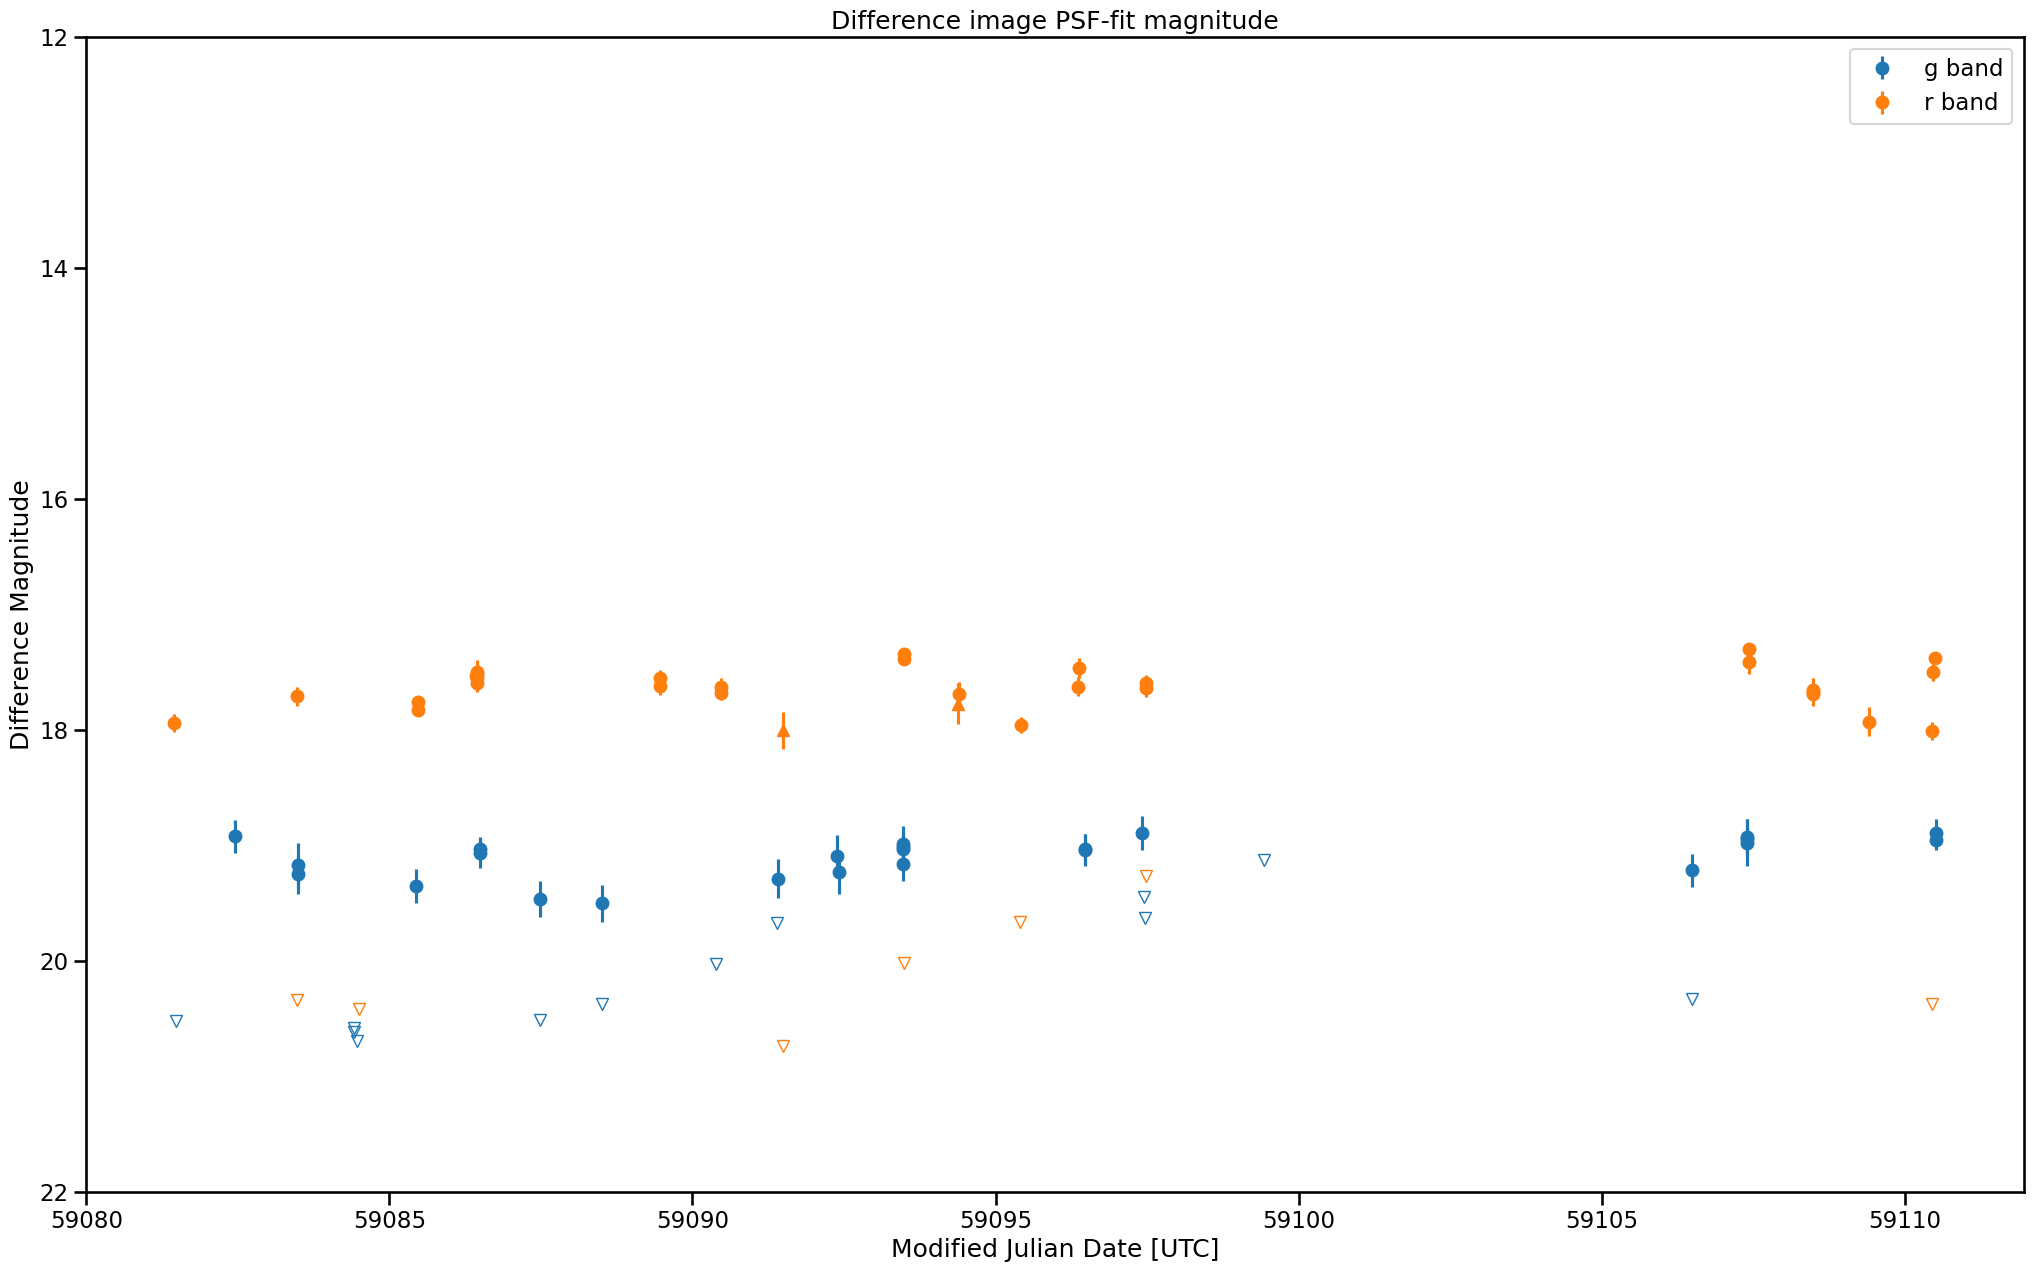

In [11]:

mjd = df['jd'].apply(lambda x: x - 2400000.5)

fig = plt.figure(figsize=(25, 15))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

# valid values 
maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)
# Upper limit values
maskUpper = pd.isna(df['magpsf'])
#bad quality values 
maskBadquality = ~maskValid & ~maskUpper


for filt in np.unique(df['fid']):
    maskFilt = df['fid'] == filt

    plt.errorbar(
        df[maskValid & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt]['magpsf'],
        df[maskValid & maskFilt]['sigmapsf'],
        ls = '', marker='o', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )

    plt.plot(
        df[maskUpper & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskUpper & maskFilt]['diffmaglim'],
        ls='', marker='v', color=colordic[filt], markerfacecolor='none'
    )
    

    plt.errorbar(
        df[maskBadquality & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskBadquality & maskFilt]['magpsf'],
        df[maskBadquality & maskFilt]['sigmapsf'],
        ls='', marker='^', color=colordic[filt]
    )

plt.ylim(12, 22)
plt.gca().invert_yaxis()
plt.legend()
plt.title('Difference image PSF-fit magnitude')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Difference Magnitude');


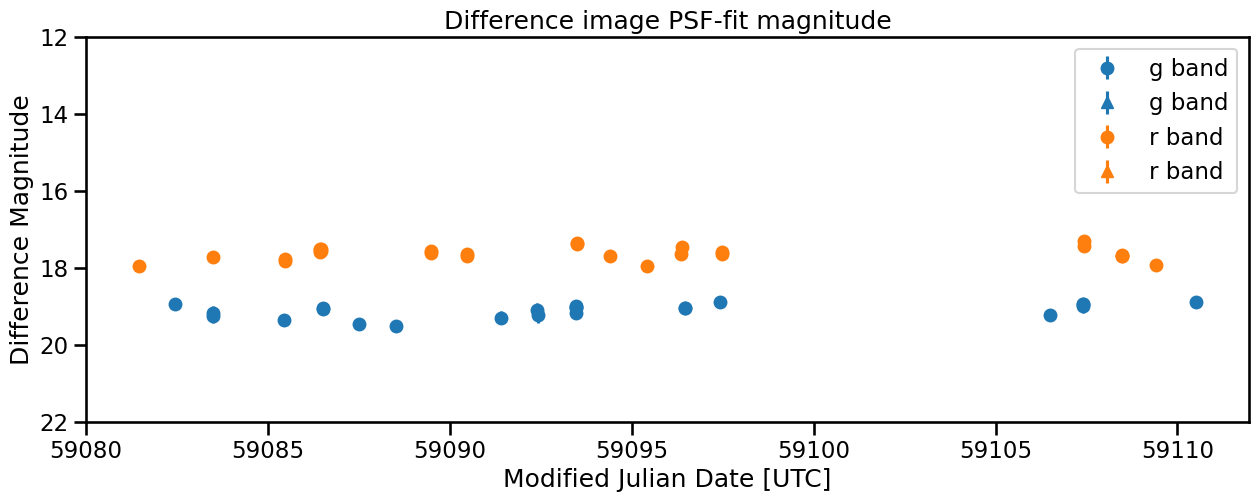

In [12]:

 

fig = plt.figure(figsize=(15, 5))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}
    
maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)

    
#t or 1 => candidate is from positive (sci minus ref) subtraction;
#f or 0 => candidate is from negative (ref minus sci) subtraction"
maskneg = (df['isdiffpos'] == 't') | (df['isdiffpos'] == 1)
maskpos = (df['isdiffpos'] == 'f') | (df['isdiffpos'] == 0)

for filt in np.unique(df['fid']):
    maskFilt = df['fid'] == filt

    # candidates from negative 

    plt.errorbar(
        df[maskValid & maskFilt & maskneg ]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt & maskneg ]['magpsf'],
        df[maskValid & maskFilt & maskneg ]['sigmapsf'],
        ls = '', marker='o', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )
    
    # candidates from positive 
    plt.errorbar(
        df[maskValid & maskFilt &  maskpos ]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt &  maskpos ]['magpsf'],
        df[maskValid & maskFilt &  maskpos ]['sigmapsf'],
        ls = '', marker='^', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )
    

plt.ylim(12, 22)
plt.gca().invert_yaxis()
plt.legend()
plt.title('Difference image PSF-fit magnitude')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Difference Magnitude');



In [13]:
# from fink_science.conversion import dc_mag
from fink_utils.photometry.conversion import dc_mag
from fink_utils.photometry.utils import is_source_behind

# Take only valid measurements
maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)
df_valid = df[maskValid].sort_values('jd', ascending=False)

isSource = is_source_behind(
    df_valid['distnr'].values[0]
)

if isSource:
    print('It looks like there is a source behind. Lets compute the DC magnitude instead.')
    
    # Use DC magnitude instead of difference mag
    mag_dc, err_dc = np.transpose(
        [
            dc_mag(*args) for args in zip(
                df_valid['magpsf'].astype(float).values,
                df_valid['sigmapsf'].astype(float).values,
                df_valid['magnr'].astype(float).values,
                df_valid['sigmagnr'].astype(float).values,
                df_valid['isdiffpos'].values
            )
        ]
    )
    
    df_valid['mag_dc'] = mag_dc
    df_valid['err_dc'] = err_dc
else:
    print('No source found -- keeping PSF fit magnitude')
    df_valid['mag_dc'] = df_valid['magpsf']
    df_valid['err_dc'] = df_valid['sigmapsf']



It looks like there is a source behind. Lets compute the DC magnitude instead.


15.549999936421711 17.255750099817913


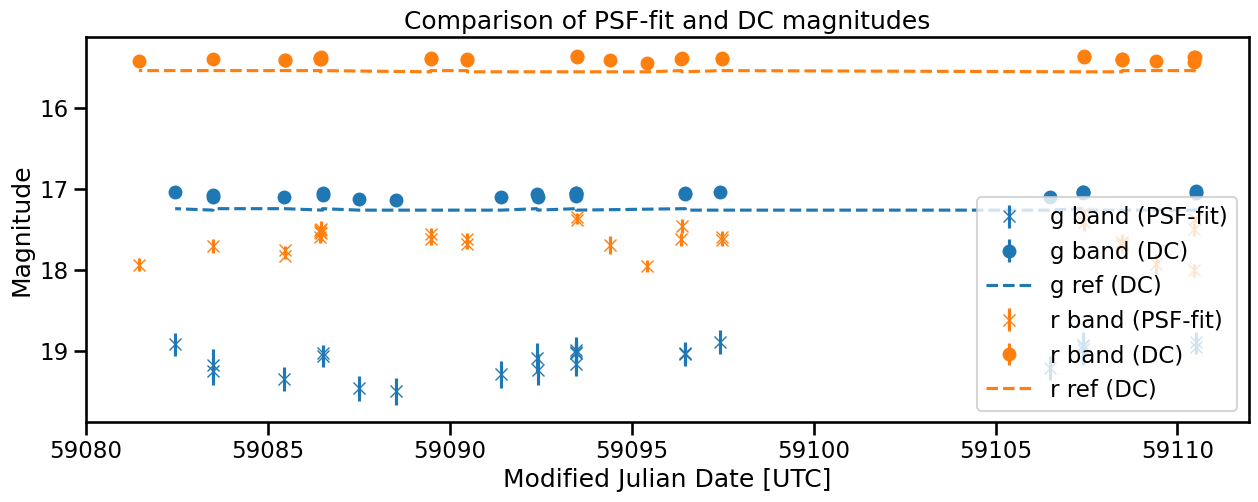

In [14]:
fig = plt.figure(figsize=(15, 5))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

for filt in np.unique(df_valid['fid']):
    maskFilt = df_valid['fid'] == filt

    plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['magpsf'],
        df_valid[maskFilt]['sigmapsf'],
        ls = '', marker='x', 
        color=colordic[filt], 
        label='{} band (PSF-fit)'.format(filtdic[filt]),
    )
    
    
    plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['mag_dc'],
        df_valid[maskFilt]['err_dc'],
        ls = '', marker='o', 
        color=colordic[filt], 
        label='{} band (DC)'.format(filtdic[filt]),
    )
    #To show if there is a variance in the reference
    plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['magnr'],
        ls = '--', 
        color=colordic[filt], 
        label='{} ref (DC)'.format(filtdic[filt]),
    )
    

ref_r = df_valid['magnr']*(df_valid['fid']==2)

ref_r = (ref_r[ref_r != 0]).mean()

ref_g = df_valid['magnr']*(df_valid['fid']==1)

ref_g = (ref_g[ref_g != 0]).mean()


print(ref_r, ref_g)
# c'est de valeurs moyennes mais sont -ils resonnables ? 
#plt.axhline(y=ref_r, color=colordic[2], linestyle='--')
#plt.axhline(y=ref_g, color=colordic[1], linestyle='--')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Comparison of PSF-fit and DC magnitudes')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Magnitude');

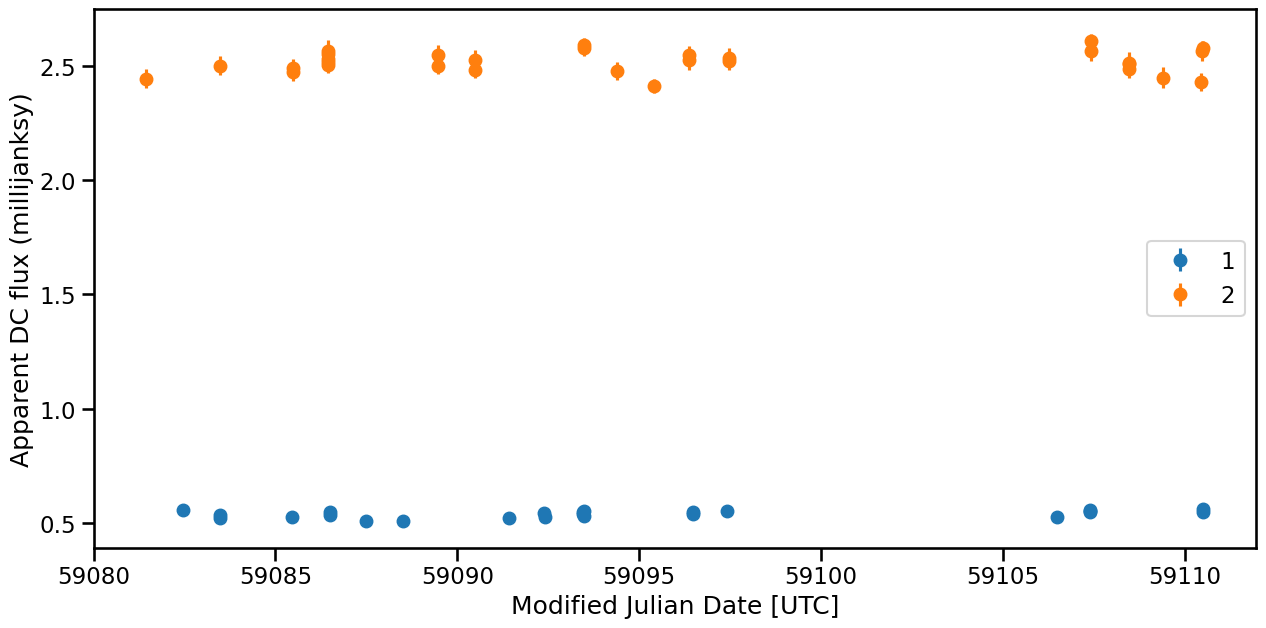

In [15]:
fig = plt.figure(figsize=(15, 7))

from fink_utils.photometry.conversion import apparent_flux


dc_flux, dc_sigflux = np.transpose(
        [
            apparent_flux(*args, jansky=True) for args in zip(
                df_valid['magpsf'].astype(float).values,
                df_valid['sigmapsf'].astype(float).values,
                df_valid['magnr'].astype(float).values,
                df_valid['sigmagnr'].astype(float).values,
                df_valid['isdiffpos'].values
            )
        ]
)

df_valid['dc_flux'] = dc_flux
df_valid['dc_sigflux'] = dc_sigflux


for filt in np.unique(df['fid']):
    mask = df_valid['fid'] == filt
    sub = df_valid[mask]
    plt.errorbar(
        sub['jd'].apply(lambda x: x - 2400000.5),
        sub['dc_flux']*1e3,#*1e7/3, 
        sub['dc_sigflux']*1e3,#*1e7/3, 
        ls='', 
        marker='o',
        label=filt
    )
plt.legend()

plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Apparent DC flux (millijanksy)');


In [16]:
id_plus_repete

'ZTF18adbmoft'

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  6.,  9., 11., 23.]),
 array([0.0052546 , 0.03442876, 0.06360291, 0.09277707, 0.12195122,
        0.15112538, 0.18029954, 0.20947369, 0.23864785, 0.267822  ,
        0.29699616, 0.32617031, 0.35534447, 0.38451863, 0.41369278,
        0.44286694, 0.47204109, 0.50121525, 0.53038941, 0.55956356,
        0.58873772, 0.61791187, 0.64708603, 0.67626019, 0.70543434,
        0.7346085 , 0.76378265, 0.79295681, 0.82213096, 0.85130512,
        0.88047928, 0.90965343, 0.93882759, 0.96800174, 0.9971759 ]),
 <BarContainer object of 34 artists>)

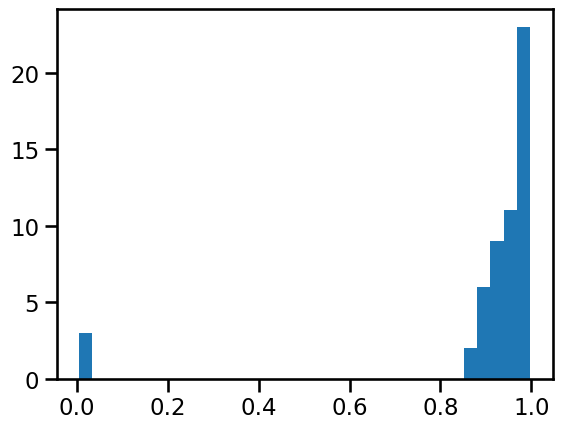

In [17]:
plt.hist(df[maskValid]['jd']%1,bins='fd')

In [18]:
df[maskValid]['jd']%0.01

0     0.001065
2     0.005683
4     0.006030
5     0.006458
6     0.006921
11    0.007407
12    0.005370
13    0.005370
14    0.001609
15    0.007755
16    0.007755
17    0.003542
18    0.004016
19    0.006701
20    0.007176
22    0.002870
24    0.005255
25    0.006481
26    0.006956
28    0.005463
29    0.005938
31    0.000023
34    0.003785
35    0.000532
36    0.004826
37    0.005301
38    0.007685
39    0.008148
41    0.000324
42    0.000324
44    0.009595
46    0.000903
47    0.009734
48    0.000243
49    0.000579
50    0.002940
51    0.001840
55    0.008634
56    0.008634
58    0.005741
60    0.005984
61    0.002326
62    0.002801
64    0.006690
65    0.006690
66    0.006782
67    0.007245
68    0.007245
69    0.002778
70    0.002581
72    0.003056
73    0.009444
74    0.006493
75    0.006968
Name: jd, dtype: float64

In [19]:
df['mjd'] = df['jd'].apply(lambda x: x - 2400000.5)


In [20]:
df_valid['date'] = pd.to_datetime(df_valid['jd'], origin='julian', unit='D')


df_valid['year'] = df_valid['date'].dt.year
df_valid['month'] = df_valid['date'].dt.month
df_valid['day'] = df_valid['date'].dt.day

# Viewing the DataFrame with the new columns
print(df_valid[[ 'year', 'month', 'day']])

#mask_most = (df_valid['year'] > 0.55) & (df['nbad'] == 0)

#max0 = max(df_valid['magpsf'][])

    year  month  day
75  2020      9   18
74  2020      9   18
73  2020      9   18
72  2020      9   18
70  2020      9   18
69  2020      9   17
68  2020      9   16
67  2020      9   16
66  2020      9   16
65  2020      9   15
64  2020      9   15
62  2020      9   15
61  2020      9   15
60  2020      9   15
58  2020      9   14
56  2020      9    5
55  2020      9    5
51  2020      9    5
50  2020      9    4
49  2020      9    4
48  2020      9    4
47  2020      9    4
46  2020      9    3
44  2020      9    2
41  2020      9    1
42  2020      9    1
39  2020      9    1
38  2020      9    1
37  2020      9    1
36  2020      9    1
35  2020      8   31
34  2020      8   31
31  2020      8   30
29  2020      8   29
28  2020      8   29
26  2020      8   28
25  2020      8   28
24  2020      8   27
22  2020      8   26
20  2020      8   25
19  2020      8   25
18  2020      8   25
17  2020      8   25
16  2020      8   25
15  2020      8   25
14  2020      8   25
13  2020     

In [21]:
df_valid['is_repeated_day'] = df_valid.duplicated(subset=['year', 'month', 'day'], keep=False)

In [23]:
# Grouping by year, month, and day and counting occurrences
counts_per_day = df_valid.groupby(['year', 'month', 'day']).size()

# Printing the counts for each day
print("Counts per day:")
print(counts_per_day)


Counts per day:
year  month  day
2020  8      20     1
             21     1
             22     3
             24     3
             25     7
             26     1
             27     1
             28     2
             29     2
             30     1
             31     2
      9      1      6
             2      1
             3      1
             4      4
             5      3
             14     1
             15     5
             16     3
             17     1
             18     5
dtype: int64
